Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [78]:
import numpy as np
import math
import statsmodels.stats.proportion as sp
import matplotlib.pyplot as plt

In [120]:
import scipy.stats as sts
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [121]:
size = 50
pr = 1
normal_interval = my_proportion_confint(pr, size, method = 'binom_test')
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [-0.018805, 0.058805] with width 0.077611


In [31]:
mor = np.zeros(50)
mor[2] = 1
mor.shape
mor.mean()

0.02

In [34]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
mor_std = mor.std(ddof=1)/math.sqrt(len(mor))
mor_std
_tconfint_generic(mor.mean(), mor_std, len(mor)-1, 0.05, 'two-sided')

(-0.020191504689784163, 0.06019150468978417)

In [32]:
wilson_interval = my_proportion_confint(pr, size, method = 'wilson')
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.003539, 0.104954] with width 0.101415


In [36]:
from statsmodels.stats.proportion import samplesize_confint_proportion
n_samples = int(np.ceil(samplesize_confint_proportion(mor.mean(), 0.01)))
n_samples
f=[]

753

9604

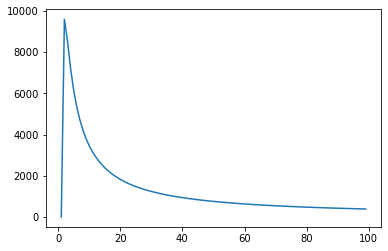

In [114]:
def sam (p):
    n_sam = []
    for i in p:
        x = (int(np.ceil(samplesize_confint_proportion(sum(mor)/i, 0.01))))
        n_sam.append(x)
    return n_sam

p = np.array(range(1, 100, 1))
sam(p)


plt.plot(p, sam(p))
plt.show
max(np.array(sam(p)))